## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

In [1]:
import os
os.chdir("D:\DataScience\Technocolabs\miniproject_1\Dr. Semmelweis and the Discovery of Handwashing\datasets")

In [2]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ... YOUR CODE FOR TASK 1 ...

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv("yearly_deaths_by_clinic.csv",index_col=0,parse_dates=True) 
yearly

# Print out yearly
# ... YOUR CODE FOR TASK 1 ...

,births,deaths,clinic
year,,,
1841-01-01,3036,237,clinic 1
1842-01-01,3287,518,clinic 1
1843-01-01,3060,274,clinic 1
1844-01-01,3157,260,clinic 1
1845-01-01,3492,241,clinic 1
1846-01-01,4010,459,clinic 1
1841-01-01,2442,86,clinic 2
1842-01-01,2659,202,clinic 2
1843-01-01,2739,164,clinic 2


In [3]:
yearly.describe()

,births,deaths
count,12.000000,12.000000
mean,3152.750000,223.333333
std,449.078476,145.383089
min,2442.000000,66.000000
25%,2901.750000,100.250000
50%,3108.500000,219.500000
75%,3338.250000,263.500000
max,4010.000000,518.000000


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [4]:
# Calculate proportion of deaths per no. births
# ... YOUR CODE FOR TASK 2 ...
yearly["death_prop"] = (yearly["deaths"]/yearly["births"])
# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly["clinic"]== "clinic 1"]
yearly2 = yearly[yearly["clinic"]== "clinic 2"]
print(yearly1.head())
# Print out yearly1
# ... YOUR CODE FOR TASK 2 ...

            births  deaths    clinic  death_prop
year                                            
1841-01-01    3036     237  clinic 1    0.078063
1842-01-01    3287     518  clinic 1    0.157591
1843-01-01    3060     274  clinic 1    0.089542
1844-01-01    3157     260  clinic 1    0.082357
1845-01-01    3492     241  clinic 1    0.069015


## 3. Death at the clinics
<p>If we now plot the proportion of deaths at both clinic 1 and clinic 2  we'll see a curious pattern...</p>

Text(0, 0.5, 'Proportion of deaths at clinics')

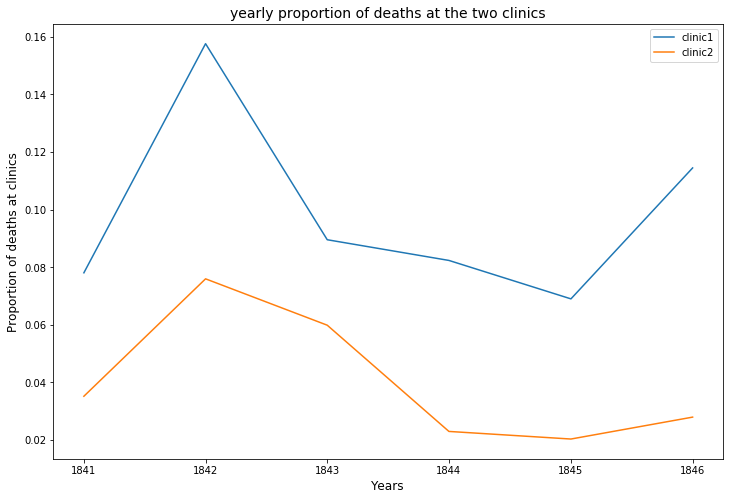

In [5]:
# This makes plots appear in the notebook
%matplotlib inline
plt.figure(figsize=(12,8))
sns.lineplot(data = yearly1["death_prop"],label = "clinic1")
sns.lineplot(data = yearly2["death_prop"],label = "clinic2")
plt.title("yearly proportion of deaths at the two clinics",fontsize=14)
plt.xlabel("Years",fontsize=12)
plt.ylabel("Proportion of deaths at clinics",fontsize=12)
# Plot yearly proportion of deaths at the two clinics


## 4. The handwashing begins
<p>Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [6]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv("monthly_deaths.csv",parse_dates = True,index_col=0)
monthly

,births,deaths
date,,
1841-01-01,254,37
1841-02-01,239,18
1841-03-01,277,12
1841-04-01,255,4
1841-05-01,255,2
...,...,...
1848-11-01,310,9
1848-12-01,373,5
1849-01-01,403,9


In [7]:
monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


In [8]:
monthly["deaths_prop"] = monthly["deaths"]/monthly["births"]

## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

Text(0, 0.5, 'Proportion of deaths')

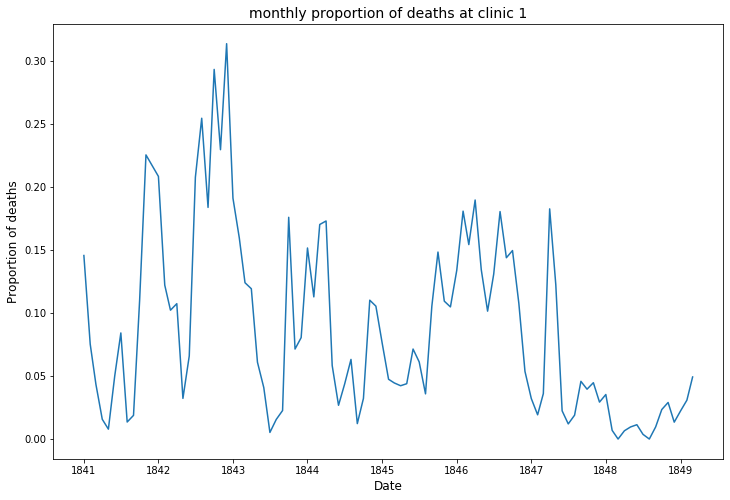

In [9]:
# Plot monthly proportion of deaths
plt.figure(figsize=(12,8))
sns.lineplot(data = monthly["deaths_prop"])
plt.title("monthly proportion of deaths at clinic 1",fontsize=14)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Proportion of deaths",fontsize=12)
# ... YOUR CODE FOR TASK 5 ...

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

Text(0, 0.5, 'Proportion of deaths at clinic 1 ')

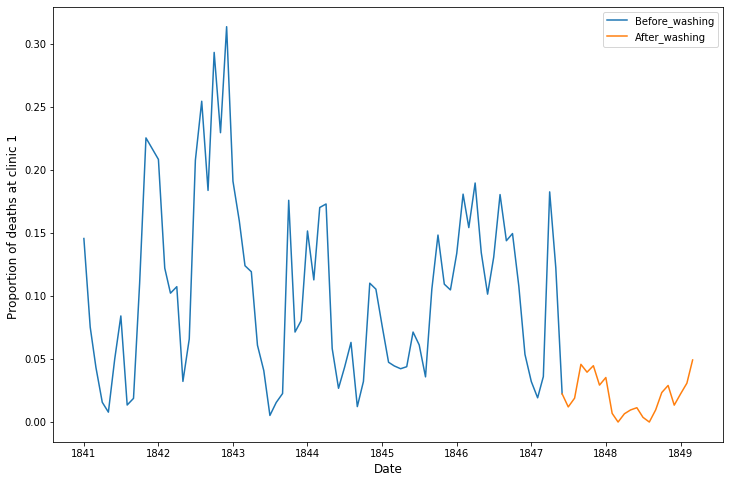

In [10]:
# Date when handwashing was made mandatory
import pandas as pd
handwashing_start = '1847-06-01'
# Split monthly into before and after handwashing_start
before_washing = monthly[:"1847-06-01"]
after_washing = monthly["1847-06-01":]
plt.figure(figsize=(12,8))
sns.lineplot(data = before_washing["deaths_prop"],label = "Before_washing")
sns.lineplot(data = after_washing["deaths_prop"],label = "After_washing")
#plt.title("yearly proportion of deaths at the two clinics",fontsize=14)
plt.xlabel("Date",fontsize=12)
plt.ylabel("Proportion of deaths at clinic 1 ",fontsize=12)

# Plot monthly proportion of deaths before and after handwashing
# ... YOUR CODE FOR TASK 6 ...

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [11]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion_mean = before_washing.deaths_prop.mean()
after_proportion_mean = after_washing.deaths_prop.mean()
mean_diff = before_proportion_mean - after_proportion_mean
mean_diff

0.08288307604550099

## 8. A Bootstrap analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>
<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [12]:
# A bootstrap analysis of the reduction of deaths due to handwashing
from random import sample
boot_mean_diff = []
for i in range(3000):
    boot_before = before_washing.deaths_prop.sample(frac = 1,replace =True)
    boot_after = after_washing.deaths_prop.sample(frac=1,replace=True)
    boot_mean_diff.append(boot_before.mean() - boot_after.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile(q=[0.025,0.975])
confidence_interval


0.025    0.065728
0.975    0.099471
dtype: float64

## 9. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

In [13]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True